In [2]:
from google.colab import drive
from os.path import join
root = "/content/drive"
print(root)
drive.mount(root)

/content/drive
Mounted at /content/drive


# 필요한 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns  
import matplotlib.pyplot as plt

# 정제한 데이터셋 가져와서 합치기

In [50]:
import os
df_all = pd.DataFrame()
year = 2020
for k in range(2):
  forders = os.listdir('/content/drive/MyDrive/Meta Data/'+str(year)+'/')
  for i in range(0,len(forders)):
      if forders[i].split('.')[1] == 'csv':
          file = '/content/drive/MyDrive/Meta Data/'+str(year)+'/'+forders[i]
          df= pd.read_csv(file,encoding='utf-8')
         
          df_all = pd.concat([df_all, df],ignore_index=True)
  year+=1
  
print(df_all)

         yyyymmdd  hhnn  stn        lon       lat    uv    band1    band2  \
0        20201101     0   13  126.16000  33.30000  0.00  0.00170  0.00171   
1        20201101     0  105  128.89098  37.75147  0.00  0.00057  0.00114   
2        20201101     0  108  126.96500  37.57100  0.00  0.00113  0.00114   
3        20201101     0  112  126.62490  37.47772  0.00  0.00113  0.00171   
4        20201101     0  115  130.89864  37.48129  0.00  0.00113  0.00057   
...           ...   ...  ...        ...       ...   ...      ...      ...   
1560888  20210930  2350  146  127.11900  35.84080  0.10 -0.00057 -0.00057   
1560889  20210930  2350  152  129.33472  35.58250  0.05 -0.00057  0.00000   
1560890  20210930  2350  156  126.89158  35.17294  0.00 -0.00057 -0.00057   
1560891  20210930  2350  159  129.03203  35.10468  0.00  0.00000  0.00000   
1560892  20210930  2350  165  126.38121  34.81689  0.00  0.00000  0.00000   

           band3    band4  ...     band14     band15     band16    solarza 

In [55]:
df_all = df_all.drop(['level_0','index'], axis = 1)

In [56]:
df_all.isnull().sum()

yyyymmdd    0
hhnn        0
stn         0
lon         0
lat         0
uv          0
band1       0
band2       0
band3       0
band4       0
band5       0
band6       0
band7       0
band8       0
band9       0
band10      0
band11      0
band12      0
band13      0
band14      0
band15      0
band16      0
solarza     0
sateza      0
esr         0
height      0
landtype    0
dtype: int64

In [57]:
df_all.isin([-999.0]).sum() 

yyyymmdd    0
hhnn        0
stn         0
lon         0
lat         0
uv          0
band1       0
band2       0
band3       0
band4       0
band5       0
band6       0
band7       0
band8       0
band9       0
band10      0
band11      0
band12      0
band13      0
band14      0
band15      0
band16      0
solarza     0
sateza      0
esr         0
height      0
landtype    0
dtype: int64

# 데이터 전처리

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 학습에 쓰일 컬럼들
scale_cols = ['band1', 'band2', 'band3','band7','band8', 'band9', 'band10', 'band11','band12', 'band13','band14','band15','band16','solarza','esr'] 

### 훈련 데이터 정규화

In [59]:
df_scaled = scaler.fit_transform(df_all[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,band1,band2,band3,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,solarza,esr
0,0.011237,0.011239,0.011826,0.814367,0.619552,0.673531,0.770745,0.818518,0.543380,0.815616,0.823865,0.838080,0.877307,0.939061,0.026147
1,0.010262,0.010751,0.011561,0.694739,0.511346,0.564492,0.615335,0.607623,0.356060,0.595370,0.574726,0.571035,0.610934,0.916200,0.038293
2,0.010745,0.010751,0.011561,0.628290,0.533837,0.595523,0.656572,0.554678,0.316544,0.542360,0.548051,0.567779,0.635075,0.914992,0.038707
3,0.010745,0.011239,0.011561,0.634673,0.514882,0.567882,0.631867,0.542461,0.310193,0.529580,0.528813,0.541278,0.601137,0.915158,0.038568
4,0.010745,0.010263,0.011826,0.746737,0.550388,0.584939,0.652420,0.681755,0.396983,0.667644,0.662378,0.676287,0.710165,0.919315,0.036857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560888,0.009279,0.009286,0.011561,0.818324,0.784560,0.818249,0.892274,0.838878,0.533323,0.825345,0.839204,0.866011,0.912365,0.849429,0.112958
1560889,0.009279,0.009774,0.010512,0.812641,0.715288,0.763031,0.865969,0.827581,0.531410,0.813223,0.825280,0.850503,0.901620,0.854154,0.106313
1560890,0.009279,0.009286,0.009727,0.826750,0.757981,0.801469,0.890448,0.848112,0.546014,0.834632,0.848341,0.872287,0.916448,0.853051,0.110670
1560891,0.009771,0.009774,0.009727,0.826485,0.736543,0.781960,0.876580,0.845898,0.547328,0.832068,0.842915,0.864984,0.913144,0.856671,0.104956


### 테스트 데이터 정규화

In [60]:
# 테스트 데이터 정규화
df = pd.read_csv('/content/drive/MyDrive/Validation Data/201908_uv_with_all_columns.csv')
df_scaled_test = scaler.fit_transform(df[scale_cols])
df_scaled_test = pd.DataFrame(df_scaled_test)
df_scaled_test.columns = scale_cols

df_scaled_test

,band1,band2,band3,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,solarza,esr
0,0.009279,0.009774,0.011480,0.776255,0.774609,0.792907,0.830117,0.860984,0.840786,0.854071,0.855130,0.870681,0.922204,0.911782,0.084557
1,0.009771,0.009286,0.010334,0.779785,0.756977,0.773799,0.820012,0.858627,0.819899,0.849266,0.846993,0.862202,0.908965,0.880805,0.116726
2,0.009771,0.009286,0.011769,0.547595,0.607105,0.654388,0.716331,0.645998,0.592574,0.641147,0.637025,0.657568,0.737687,0.879371,0.117872
3,0.009771,0.009286,0.010903,0.382422,0.530388,0.543134,0.545753,0.451454,0.385844,0.437800,0.436088,0.445932,0.523170,0.879678,0.117486
4,0.009279,0.009286,0.010045,0.767209,0.844851,0.854961,0.870365,0.857840,0.821540,0.849826,0.852778,0.870413,0.920581,0.885286,0.112426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65484,0.010262,0.010263,0.012049,0.670731,0.681769,0.683180,0.727974,0.735676,0.680906,0.726956,0.712898,0.714583,0.759376,0.968865,0.054298
65485,0.010262,0.009774,0.012627,0.630241,0.650825,0.661854,0.706626,0.686529,0.633800,0.677922,0.655252,0.653499,0.700588,0.975030,0.045428
65486,0.010262,0.010263,0.011480,0.678261,0.668960,0.680798,0.728673,0.747076,0.690815,0.733646,0.735344,0.753075,0.807246,0.973628,0.050641
65487,0.010262,0.010263,0.012338,0.451424,0.610742,0.600076,0.610366,0.483959,0.410955,0.463601,0.456067,0.473667,0.535964,0.978302,0.043181


### 3차원으로 재구성

In [61]:
# 3차원으로 재구성하기
X_train = df_scaled.values
X_train_t = X_train.reshape(X_train.shape[0], X_train.shape[1],1) # 데이터셋 수, 칼럼 수, 1

X_test = df_scaled_test.values
X_test_t = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

y_train = df_all['uv'].values
y_test = df['uv'].values


# 모델 학습

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

# LSTM 아키텍처 (architecture)
model = Sequential()
model.add(LSTM(units = 50, input_shape=(len(scale_cols), 1), activation='relu')) 
model.add(Dense(1))

# 컴파일링
model.compile(optimizer='adam', loss='mse')

# training data 세트에 피팅하기
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)
model.fit(X_train_t, y_train, epochs = 10, batch_size = 150, verbose = 1, callbacks=[early_stop])


Epoch 1/10
10406/10406 [==============================] - 225s 19ms/step - loss: 0.4763
Epoch 2/10
10406/10406 [==============================] - 189s 18ms/step - loss: 0.2826
Epoch 3/10
10406/10406 [==============================] - 189s 18ms/step - loss: 0.2617
Epoch 4/10
10406/10406 [==============================] - 189s 18ms/step - loss: 0.2536
Epoch 5/10
10406/10406 [==============================] - 188s 18ms/step - loss: 0.2496
Epoch 6/10
10406/10406 [==============================] - 189s 18ms/step - loss: 0.2456
Epoch 7/10
10406/10406 [==============================] - 192s 18ms/step - loss: 0.2415
Epoch 8/10
10406/10406 [==============================] - 192s 18ms/step - loss: 0.2392
Epoch 9/10
10406/10406 [==============================] - 187s 18ms/step - loss: 0.2367
Epoch 10/10
10406/10406 [==============================] - 187s 18ms/step - loss: 0.2345


### 예측하기

In [63]:
#X_test_t를 LSTM 모델에 넣어서 예측하기
y_pred = model.predict(X_test_t)

2047/2047 [==============================] - 6s 3ms/step


### 그래프로 보기

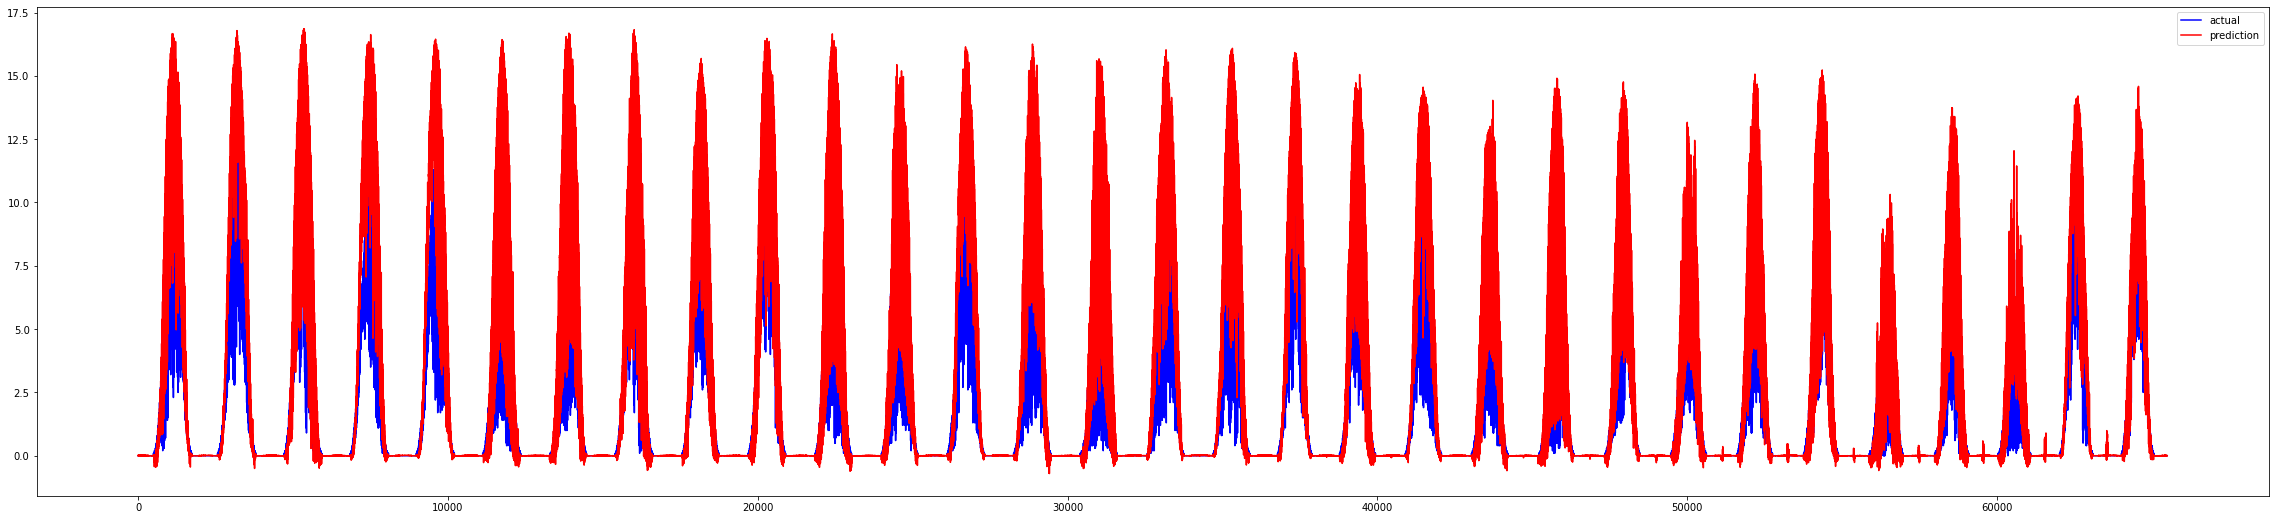

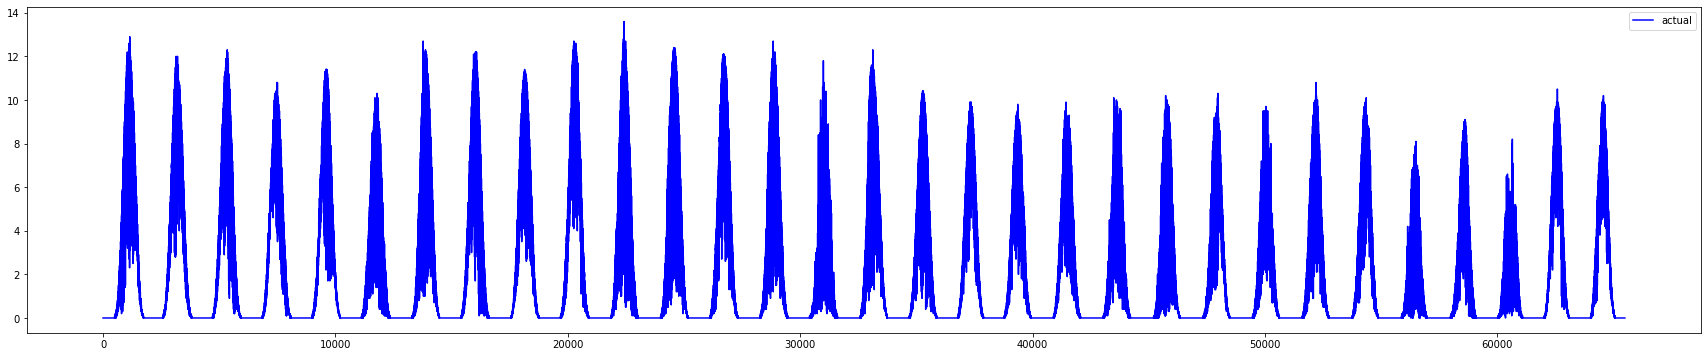

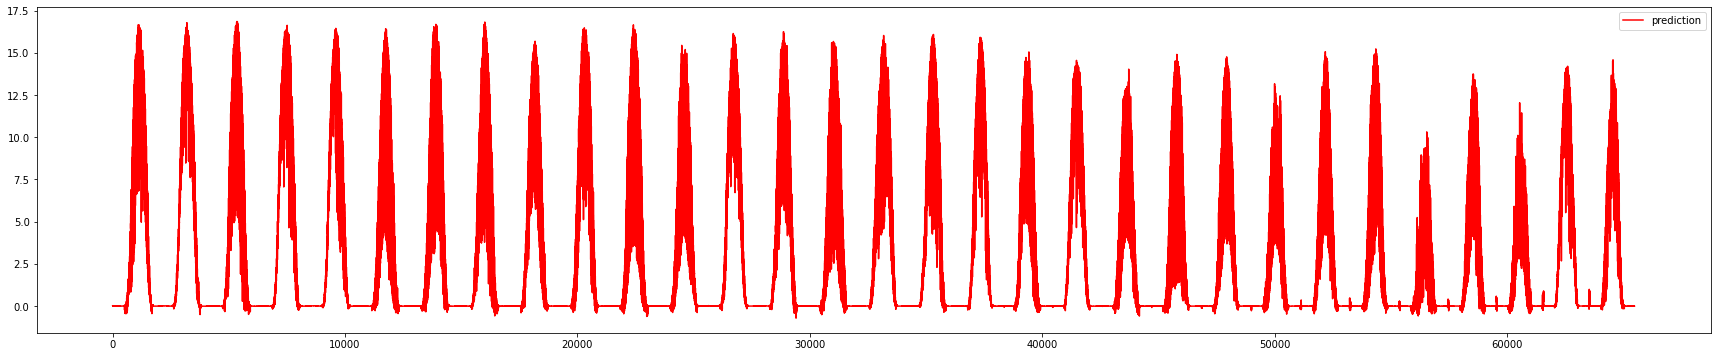

In [64]:
# print('accuracy : {:2%}'.format(np.mean(y_pred == y_test)))
plt.figure(figsize=(40, 9))
plt.plot(y_test, 'b', label = 'actual')
plt.plot(y_pred, 'r', label = 'prediction')
plt.legend()
plt.show()

# 따로 보기
plt.figure(figsize = (30,6)) # Plotting
plt.plot(y_test, 'b', label = 'actual')
plt.legend()
plt.show()
plt.figure(figsize=(30, 6))
plt.plot(y_pred, 'r', label = 'prediction')
plt.legend()
plt.show()

### 성능 평가하기

In [65]:
# 성능 평가하기
DIFF = 0.2 # 오차범위
predict_value = pd.DataFrame(y_pred)
real_value = pd.DataFrame(y_test)
result = pd.concat([real_value, predict_value],axis = 1)
result.columns = ['real','predict']
count = 0
for i in range(len(result)):
  if abs(result['real'][i] - result['predict'][i]) <= DIFF:
    count+=1
TP = round(count/len(result),3)
print("오차 범위",DIFF,"일 때 TP 값:",TP)

오차 범위 0.2 일 때 TP 값: 0.553
